## Organizações não governamentais de ambiente por 100 000 habitantes (N.º) por Localização geográfica (NUTS - 2013); Anual
https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&indOcorrCod=0008290&contexto=bd&selTab=tab2

### Base de dados: Nuts 2013

### Sinais convencionais
Sinais convencionais por ausência de valor
- `…`	Dado confidencial
- `-`	Dado nulo ou não aplicável
- `x`	Dado não disponível
- `o`	Dado inferior a metade do módulo da unidade utilizada
- `∞`	Infinito

Sinais convencionais adicionais ao valor
- `//` Dado preliminar
- `&`	Dado provisório
- `»`	Dado previsto
- `*`	Dado rectificado
- `§`	Desvio do padrão de qualidade/Coeficiente de variação elevado
- `“`	Estimativa
- `“E` Dado estimado pelo Eurostat
- `┴`	Quebra de série/comparabilidade
- `i`	Mais informação em anexo

## Sinais convencionais diversos
- `µ`	Média
- `=`	Igual
- `>`	Maior que
- `≥`	Maior ou igual
- `<`	Menor que
- `≤`	Menor ou igual
- `%`	Percentagem
- `‰`	Permilagem
- `∑`	Soma de
- `≠`	Diferente

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data, drop all the non used rows, 

In [14]:
data=pd.read_csv("ine_principais_culturas_agricolas.csv",delimiter=";", encoding="latin-1", header=[4, 6], nrows=8, on_bad_lines="skip")
data.head()

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0,Unnamed: 3421_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite,Unnamed: 3421_level_1
0,NaN,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,...,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,kg/ ha,NaN
1,PT: Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,4199,4122,x x,x x,x x,6720,1048,1961,1018,NaN
2,1: Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,4124,4046,x x,x x,x x,6720,1048,1961,1018,NaN
3,11: Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,3853,3852,x x,x x,x x,4924,1463,2777,1380,NaN
4,16: Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,4153,4047,x x,x x,x x,8552,1155,1546,1143,NaN


In [15]:
data.drop(labels=[0], inplace=True) # Drop first row
data.drop(columns=data.columns[-1], inplace=True) # Drop last column
data.head()

,Unnamed: 0_level_0,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0,Unnamed: 3420_level_0
,Unnamed: 0_level_1,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,...,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa,Azeitona para azeite
1,PT: Portugal,5372,2342,2272,2734,1142,1213,2901,1467,10105,...,1334,4199,4122,x x,x x,x x,6720,1048,1961,1018
2,1: Continente,5373,2342,2272,2734,1142,1213,2901,1467,10110,...,1334,4124,4046,x x,x x,x x,6720,1048,1961,1018
3,11: Norte,3632,1689,1689,- -,1405,990,994,1511,5190,...,1453,3853,3852,x x,x x,x x,4924,1463,2777,1380
4,16: Centro,6609,1934,1893,2460,712,858,3027,1087,9931,...,1283,4153,4047,x x,x x,x x,8552,1155,1546,1143
5,17: Área Metropolitana de Lisboa,7356,3803,3911,2955,- -,1490,3648,2298,13201,...,555,4184,4040,x x,x x,x x,7580,110,- -,110


## Reset of the Index as Region with just the region codes

In [16]:
data[["Region", "Region_names"]] = data[data.columns[0]].str.split(
    ":",
    expand=True,
)
region_names = data["Region_names"].to_list()
data.set_index("Region", inplace=True)
columns_to_rem = [0, -1, -2]
data.drop(data.columns[columns_to_rem], axis=1, inplace=True)
data

,2021,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,...,Unnamed: 3410_level_0,Unnamed: 3411_level_0,Unnamed: 3412_level_0,Unnamed: 3413_level_0,Unnamed: 3414_level_0,Unnamed: 3415_level_0,Unnamed: 3416_level_0,Unnamed: 3417_level_0,Unnamed: 3418_level_0,Unnamed: 3419_level_0
,Cereais para grão,Trigo,Trigo mole,Trigo duro,Centeio,Aveia,Cevada,Triticale,Milho,Milho regadio,...,Noz,Avelã,Vinha,Uva para vinho,Uva para vinho (DOP),Uva para vinho (IGP),Uva para vinho (Vinhos sem certificação),Uva de mesa,Olival,Azeitona de mesa
Region,,,,,,,,,,,,,,,,,,,,,
PT,5372,2342,2272,2734,1142,1213,2901,1467,10105,10925,...,2000,1334,4199,4122,x x,x x,x x,6720,1048,1961
1,5373,2342,2272,2734,1142,1213,2901,1467,10110,10926,...,2000,1334,4124,4046,x x,x x,x x,6720,1048,1961
11,3632,1689,1689,- -,1405,990,994,1511,5190,5982,...,1039,1453,3853,3852,x x,x x,x x,4924,1463,2777
16,6609,1934,1893,2460,712,858,3027,1087,9931,10909,...,2097,1283,4153,4047,x x,x x,x x,8552,1155,1546
17,7356,3803,3911,2955,- -,1490,3648,2298,13201,13201,...,2455,555,4184,4040,x x,x x,x x,7580,110,- -
18,5386,2492,2425,2800,911,1307,2974,1483,13845,13845,...,3173,1305,4713,4777,x x,x x,x x,3948,772,1552
15,1609,1107,1071,1254,641,863,902,811,9120,12261,...,1897,1000,4947,2266,x x,x x,x x,8674,1980,774


## Redo the headers

In [17]:
c0 = data.columns.get_level_values(0).to_series()
c1 = list(data.columns.get_level_values(1).to_series())
c0 = c0.mask(lambda c: c.str.startswith("Unnamed")).ffill()
data.columns = [c0, c1]
data

2021                                                   \
       Cereais para grão Trigo Trigo mole Trigo duro Centeio Aveia Cevada   
Region                                                                      
PT                  5372  2342       2272       2734    1142  1213   2901   
1                   5373  2342       2272       2734    1142  1213   2901   
11                  3632  1689       1689        - -    1405   990    994   
16                  6609  1934       1893       2460     712   858   3027   
17                  7356  3803       3911       2955     - -  1490   3648   
18                  5386  2492       2425       2800     911  1307   2974   
15                  1609  1107       1071       1254     641   863    902   

                                       ...  1986                             \
       Triticale  Milho Milho regadio  ...   Noz Avelã Vinha Uva para vinho   
Region                                 ...                                    
PT          1467  10105         10925  ...  2000  1334  4199           4122   
1           1467  10110         10926  ...  2000  1334  4124           4046   
11          1511   5190          5982  ...  1039  1453  3853           3852   
16          1087   9931         10909  ...  2097  1283  4153           4047   
17          2298  13201         13201  ...  2455   555  4184           4040   
18          1483  13845         13845  ...  3173  1305  4713           4777   
15           811   9120         12261  ...  1897  1000  4947           2266   

                                                  \
       Uva para vinho (DOP) Uva para vinho (IGP)   
Region                                             
PT                      x x                  x x   
1                       x x                  x x   
11                      x x                  x x   
16                      x x                  x x   
17                      x x                  x x   
18                      x x                  x x   
15                      x x                  x x   

                                                                    \
       Uva para vinho (Vinhos sem certificação) Uva de mesa Olival   
Region                                                               
PT                                          x x        6720   1048   
1                                           x x        6720   1048   
11                                          x x        4924   1463   
16                                          x x        8552   1155   
17                                          x x        7580    110   
18                                          x x        3948    772   
15                                          x x        8674   1980   

                         
       Azeitona de mesa  
Region                   
PT                 1961  
1                  1961  
11                 2777  
16                 1546  
17                  - -  
18                 1552  
15                  774  

[7 rows x 3419 columns]

## Bring the year to the index

In [18]:
data = data.stack(level=0)
data.index.names=['Region', 'year']
data

Abacate Abóbora (inclui butternut) Alface Alho Alho-porro Ameixa  \
Region year                                                                    
PT     1986       x                          x    x x    x          x   6006   
       1987       x                          x    x x    x          x   6266   
       1988       x                          x    x x    x          x   5173   
       1989       x                          x    x x    x          x   5769   
       1990       x                          x    x x    x          x   6436   
...             ...                        ...    ...  ...        ...    ...   
15     2017     x x                        x x    x x  x x        x x  12861   
       2018     - -                        x x    x x  x x        x x  12861   
       2019    6870                        x x    x x  x x        x x  12714   
       2020    7548                        x x    x x  x x        x x  12753   
       2021    8536                        x x    x x  x x        x x  12758   

            Amoras Amêndoa Ananás Arroz  ... Trigo Trigo duro Trigo mole  \
Region year                              ...                               
PT     1986    x x     848    x x  4463  ...  1630       1250       1669   
       1987    x x     996    x x  4322  ...  1694       1355       1727   
       1988    x x     506    x x  4266  ...  1380        789       1425   
       1989    x x    1237    x x  4290  ...  1915       1197       1977   
       1990    x x    1098    x x  4614  ...  1429       1270       1445   
...            ...     ...    ...   ...  ...   ...        ...        ...   
15     2017    x x     143    - -  4985  ...  1409       1558       1371   
       2018  10000     157    - -  5981  ...  1432       1584       1400   
       2019  10546     164    - -  5527  ...  1084       1093       1081   
       2020  10546     173    - -  5803  ...  1415       1522       1388   
       2021  10546     181    - -  5513  ...  1107       1254       1071   

            Triticale Uva de mesa Uva para vinho Uva para vinho (DOP)  \
Region year                                                             
PT     1986      1405        6720           4122                  x x   
       1987      1410        7702           5765                  x x   
       1988      1237        3179           1965                  x x   
       1989      1666        5517           3963                  x x   
       1990      1244        5740           5806                  x x   
...               ...         ...            ...                  ...   
15     2017      1118       11883         1746 &                  x x   
       2018      1129       12115           1886                  x x   
       2019       855       12203           1419                  x x   
       2020      1111       12203           1329                  x x   
       2021       811       12194         1624 &                  x x   

            Uva para vinho (IGP) Uva para vinho (Vinhos sem certificação)  \
Region year                                                                 
PT     1986                  x x                                      x x   
       1987                  x x                                      x x   
       1988                  x x                                      x x   
       1989                  x x                                      x x   
       1990                  x x                                      x x   
...                          ...                                      ...   
15     2017                  x x                                      x x   
       2018                  x x                                      x x   
       2019                  x x                                      x x   
       2020                  x x                                      x x   
       2021                  x x                                      x x   

              Vinha  
Region y

## Replacing values

In [19]:
# Replacing 'x', 'x x', '- -' for their respective value
data.replace({'x':np.nan,'x x':np.nan,'- -':0,'nan':np.nan},inplace=True)
# Replacing provisional data 
for column in data:
    data[column]=data[column].map(lambda x: str(x).rstrip(' &'))
    data[column]=data[column].map(lambda x: str(x).rstrip(' *'))

# This method turns data to stringd so we have to turn the data back to numeric

In [20]:
for column in data:
    data[column]=pd.to_numeric(data[column],'coerce')

data

Abacate  Abóbora (inclui butternut)  Alface  Alho  Alho-porro  \
Region year                                                                  
PT     1986      NaN                         NaN     NaN   NaN         NaN   
       1987      NaN                         NaN     NaN   NaN         NaN   
       1988      NaN                         NaN     NaN   NaN         NaN   
       1989      NaN                         NaN     NaN   NaN         NaN   
       1990      NaN                         NaN     NaN   NaN         NaN   
...              ...                         ...     ...   ...         ...   
15     2017      NaN                         NaN     NaN   NaN         NaN   
       2018      0.0                         NaN     NaN   NaN         NaN   
       2019   6870.0                         NaN     NaN   NaN         NaN   
       2020   7548.0                         NaN     NaN   NaN         NaN   
       2021   8536.0                         NaN     NaN   NaN         NaN   

             Ameixa   Amoras  Amêndoa  Ananás  Arroz  ...  Trigo  Trigo duro  \
Region year                                           ...                      
PT     1986    6006      NaN      848     NaN   4463  ...   1630        1250   
       1987    6266      NaN      996     NaN   4322  ...   1694        1355   
       1988    5173      NaN      506     NaN   4266  ...   1380         789   
       1989    5769      NaN     1237     NaN   4290  ...   1915        1197   
       1990    6436      NaN     1098     NaN   4614  ...   1429        1270   
...             ...      ...      ...     ...    ...  ...    ...         ...   
15     2017   12861      NaN      143     0.0   4985  ...   1409        1558   
       2018   12861  10000.0      157     0.0   5981  ...   1432        1584   
       2019   12714  10546.0      164     0.0   5527  ...   1084        1093   
       2020   12753  10546.0      173     0.0   5803  ...   1415        1522   
       2021   12758  10546.0      181     0.0   5513  ...   1107        1254   

             Trigo mole  Triticale  Uva de mesa  Uva para vinho  \
Region year                                                       
PT     1986        1669       1405         6720            4122   
       1987        1727       1410         7702            5765   
       1988        1425       1237         3179            1965   
       1989        1977       1666         5517            3963   
       1990        1445       1244         5740            5806   
...                 ...        ...          ...             ...   
15     2017        1371       1118        11883            1746   
       2018        1400       1129        12115            1886   
       2019        1081        855        12203            1419   
       2020        1388       1111        12203            1329   
       2021        1071        811        12194            1624   

             Uva para vinho (DOP)  Uva para vinho (IGP)  \
Region year                                               
PT     1986                   NaN                   NaN   
       1987                   NaN                   NaN   
       1988                   NaN                   NaN   
       1989                   NaN                   NaN   
       1990                   NaN                   NaN   
...                           ...                   ...   
15     2017                   NaN                   NaN   
       2018                   NaN                   NaN   
       2019                   NaN                   NaN   
       2020                   NaN                   NaN   
       2021                   NaN                   NaN   

             Uva para vinho (Vinhos sem certificação)  Vinha  
Region year                                                   
PT     1986                                       NaN   4199  
       1987                                       NaN   5824  
       1988                                       NaN   2002  
  

## Creating a few graphs
- https://www.w3schools.com/python/pandas/pandas_plotting.asp
Mas que raio lisboa tem a mania que é grande ... alterar de "Área metropolitana de Lisboa" para "Lisboa" apenas ... poderei "Alfacinhas"

In [21]:
data.columns[0]

'Abacate'

In [22]:
region_names[4] = "Lisboa"

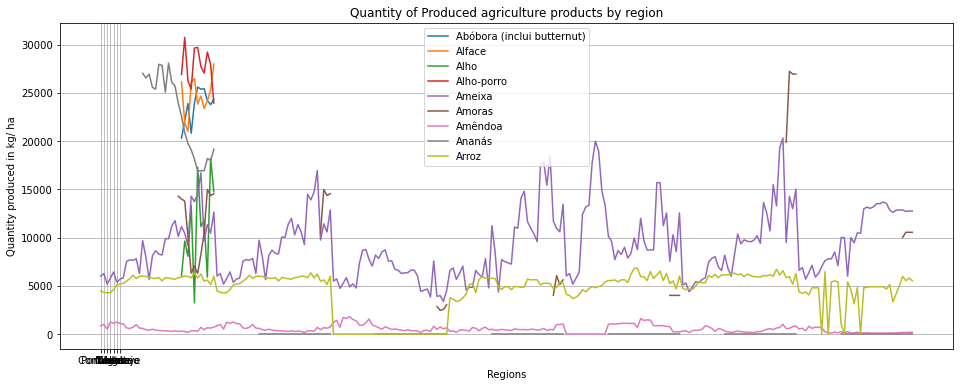

In [23]:
data[data.columns[1:10]] = data[data.columns[1:10]].astype(float)
data[data.columns[1:10]].plot(figsize=(16, 6))
plt.title("Quantity of Produced agriculture products by region")
plt.xlabel("Regions")
plt.ylabel("Quantity produced in kg/ ha")
plt.grid()
plt.xticks(range(len(region_names)), region_names)
plt.show()

In [24]:
data.T

Region                                        PT                          \
year                                        1986    1987    1988    1989   
Abacate                                      NaN     NaN     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN     NaN     NaN   
Alface                                       NaN     NaN     NaN     NaN   
Alho                                         NaN     NaN     NaN     NaN   
Alho-porro                                   NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
Uva para vinho                            4122.0  5765.0  1965.0  3963.0   
Uva para vinho (DOP)                         NaN     NaN     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN     NaN     NaN   
Vinha                                     4199.0  5824.0  2002.0  4014.0   

Region                                                                    \
year                                        1990    1991    1992    1993   
Abacate                                      NaN     NaN     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN     NaN     NaN   
Alface                                       NaN     NaN     NaN     NaN   
Alho                                         NaN     NaN     NaN     NaN   
Alho-porro                                   NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
Uva para vinho                            5806.0  5008.0  3987.0  2550.0   
Uva para vinho (DOP)                         NaN     NaN     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN     NaN     NaN   
Vinha                                     5803.0  5036.0  4039.0  2657.0   

Region                                                    ...      15          \
year                                        1994    1995  ...    2012    2013   
Abacate                                      NaN     NaN  ...     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN  ...     NaN     NaN   
Alface                                       NaN     NaN  ...     NaN     NaN   
Alho                                         NaN     NaN  ...     NaN     NaN   
Alho-porro                                   NaN     NaN  ...     NaN     NaN   
...                                          ...     ...  ...     ...     ...   
Uva para vinho                            3528.0  4010.0  ...  1420.0  1315.0   
Uva para vinho (DOP)                         NaN     NaN  ...     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN  ...     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN  ...     NaN     NaN   
Vinha                                     3633.0  4124.0  ...  3456.0  3580.0   

Region                                                                    \
year                                        2014    2015    2016    2017   
Abacate                                      NaN     NaN     NaN     NaN   
Abóbora (inclui butternut)                   NaN     NaN     NaN     NaN   
Alface                                       NaN     NaN     NaN     NaN   
Alho                                         NaN     NaN     NaN     NaN   
Alho-porro                                   NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
Uva para vinho                            1186.0  1504.0  1153.0  1746.0   
Uva para vinho (DOP)                         NaN     NaN     NaN     NaN   
Uva para vinho (IGP)                         NaN     NaN     NaN     NaN   
Uva para vinho (Vinhos sem certificação)     NaN     NaN     NaN     NaN   
Vinha                                     3468.0  3842.0

In [25]:
# data[filter_col[0]]["PT"]

In [26]:
filter_col = [col for col in data if col[1].startswith("Trigo")]
data_norte_trigo = {
    "year": [],
}
for col in filter_col:
    if col[1] not in data_norte_trigo:
        data_norte_trigo[col[1]] = []
    data_norte_trigo[col[1]].append(data[col]["PT"])
    if col[0] not in data_norte_trigo["year"]:
        data_norte_trigo["year"].append(col[0])

In [27]:
data_norte_trigo.keys()

dict_keys(['year'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


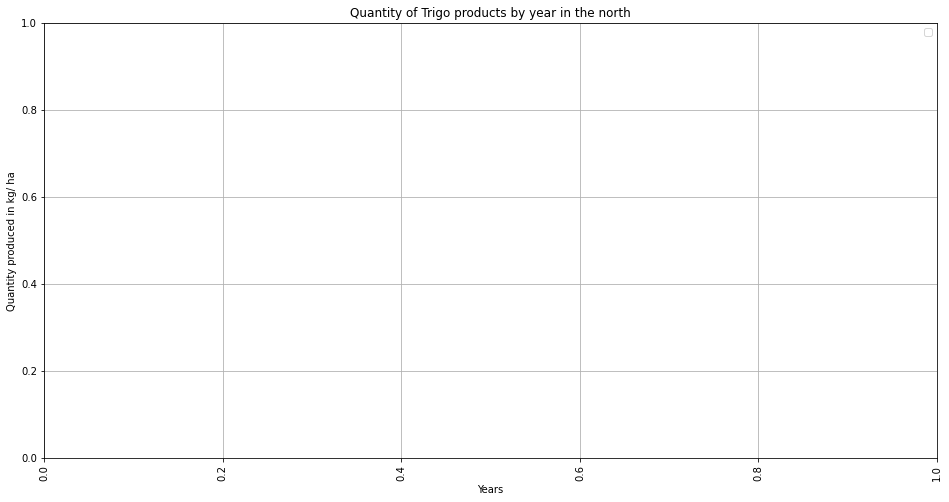

In [28]:
plt.figure(figsize=(16, 8))
for nkey, key in enumerate(data_norte_trigo):
    if nkey > 0:
        plt.plot(data_norte_trigo["year"], data_norte_trigo[key], label=key, marker="o")
plt.grid()
plt.title("Quantity of Trigo products by year in the north")
plt.xlabel("Years")
plt.ylabel("Quantity produced in kg/ ha")
plt.legend()
plt.xticks(rotation="vertical")
plt.show()

In [29]:
# for key in ["Trigo mole", "Trigo duro"]:
#     plt.hist(data_norte_trigo[key], 10, label=key, alpha = 0.7)
# plt.grid()
# plt.title("Histogram of Trigo products in the north")
# plt.xlabel("Quantity produced in kg/ ha")
# plt.ylabel("Amount")
# plt.legend()
# plt.xticks(rotation='vertical')
# plt.show()

- Shet 0 is metadata
- Shet 1 is tmin
- Shet 2 is tmax
- Shet 3 is Pluviosity

### From excel data we have:
Region 11=11

Region 16=132

Region 17=320

Region 18=571

Region 15=554

Region Açores=360

Region Madeira=522

In [30]:
excel_list = [11, 132, 320, 571, 554]
code_list = [11, 16, 17, 18, 15]

In [31]:
def add_extra_col(type_data, k):
    index_describe = 2
    if k == 3:
        index_describe = 7
        k = 0
    elif k == 4:
        index_describe = 3
        k = 1


    for k2, excel_code in enumerate(excel_list):
        code = code_list[k2]
        meteo2 = pd.read_excel(
            f"./Dossier/Labs/Data/IPMA/{excel_code}-tx-tn-prec.xlsx", sheet_name=(k + 1)
        )
        meteo2.dropna(axis=0, how="any", inplace=True)
        meteo2 = meteo2[meteo2.year > 1986]
        meteo2.set_index("year", inplace=True)
        meteo2.index.names = ["Region"]
        data_prec = meteo2.transpose().describe()
        indexNamesArr = data_prec.index.values
        indexNamesArr[index_describe] = code
        for k_name in indexNamesArr:
            if k_name != code:
                data_prec.drop(index=k_name, inplace=True)

        years_list = data_prec.keys()
        years_list
        header = [years_list, [type_data] * len(years_list)]
        data_prec.columns = header
        data_f = data_prec if k2 == 0 else pd.concat([data_f, data_prec])
    return data_f

In [32]:
ipma = {
    type_data: add_extra_col(type_data, k)
    for k, type_data in enumerate(["Tmin", "Tmax", "Prec", "TmaxA", "TminA"])
}

FileNotFoundError: [Errno 2] No such file or directory: './Dossier/Labs/Data/IPMA/11-tx-tn-prec.xlsx'

In [ ]:
ipma

{'Tmin': Region      1987      1988      1989      1990      1991      1992      1993  \
             Tmin      Tmin      Tmin      Tmin      Tmin      Tmin      Tmin   
 11      4.568469  4.030819  4.752958  4.807916  4.912407  4.353499  4.072264   
 16      4.101555  3.974269  4.273469  4.241293  4.655638  4.475362  4.118985   
 17      2.643503  3.099071  3.054654  2.986168  3.324872  2.363100  2.717564   
 18      4.841596  4.695673  4.812039  5.010197  5.534852  4.479295  4.207758   
 15      4.026800  4.596784  4.014355  4.381428  4.913778  4.338910  4.056753   
 
 Region      1994      1995      1996  ...      2010      2011      2012  \
             Tmin      Tmin      Tmin  ...      Tmin      Tmin      Tmin   
 11      3.787649  3.895248  4.165406  ...  5.287865  3.886726  4.196100   
 16      4.442519  3.620065  3.478770  ...  4.090906  3.982721  4.836267   
 17      2.830181  2.641668  3.588481  ...  3.246005       NaN       NaN   
 18      3.983143  4.212892  4.567785  ... 

In [ ]:
meteo = pd.concat([ipma["Tmin"], ipma["Tmax"], ipma["Prec"], ipma["TminA"], ipma["TmaxA"]], axis=1)
meteo = meteo.reindex(sorted(meteo.columns), axis=1)
meteo

Region        1987                                                  1988  \
              Prec      Tmax      TmaxA      Tmin      TminA        Prec   
11      136.926798  6.768706   0.200000  4.568469  25.200000  107.198616   
16       57.161421  6.430949   5.441935  4.101555  31.496774   52.925187   
17       85.517315  3.175319  11.300000  2.643503  24.300000   52.869055   
18       68.912823  7.286399   5.338710  4.841596  30.293548   68.190795   
15       80.011243  4.923390   7.912903  4.026800  28.580645  104.371215   

Region                                            ...      2017             \
            Tmax      TmaxA      Tmin      TminA  ...      Tmin      TminA   
11      6.188620   0.700000  4.030819  24.000000  ...  4.276346  26.922581   
16      5.996297   2.922581  3.974269  32.730000  ...  4.136482  33.151613   
17      3.755753  10.400000  3.099071  25.400000  ...       NaN        NaN   
18      6.601232   5.434483  4.695673  29.993548  ...  4.814165  32.751613   
15      5.012162   8.144828  4.596784  30.077419  ...       NaN        NaN   

Region        2018                                                 2019  \
              Prec      Tmax     TmaxA      Tmin      TminA        Prec   
11      151.983070  7.474769 -1.153571  4.949481  28.825806  111.926774   
16       62.457469  6.819466  5.360714  4.311781  34.709677         NaN   
17             NaN       NaN       NaN       NaN        NaN         NaN   
18       98.376853  7.940982  4.357143  5.473375  34.100000         NaN   
15       42.797248  5.033108  7.510714  4.826156  31.261290         NaN   

Region                      
           TmaxA      Tmin  
11      0.822581  3.960763  
16           NaN       NaN  
17           NaN       NaN  
18           NaN       NaN  
15           NaN       NaN  

[5 rows x 163 columns]

In [ ]:
meteo

Region        1987                                                  1988  \
              Prec      Tmax      TmaxA      Tmin      TminA        Prec   
11      136.926798  6.768706   0.200000  4.568469  25.200000  107.198616   
16       57.161421  6.430949   5.441935  4.101555  31.496774   52.925187   
17       85.517315  3.175319  11.300000  2.643503  24.300000   52.869055   
18       68.912823  7.286399   5.338710  4.841596  30.293548   68.190795   
15       80.011243  4.923390   7.912903  4.026800  28.580645  104.371215   

Region                                            ...      2017             \
            Tmax      TmaxA      Tmin      TminA  ...      Tmin      TminA   
11      6.188620   0.700000  4.030819  24.000000  ...  4.276346  26.922581   
16      5.996297   2.922581  3.974269  32.730000  ...  4.136482  33.151613   
17      3.755753  10.400000  3.099071  25.400000  ...       NaN        NaN   
18      6.601232   5.434483  4.695673  29.993548  ...  4.814165  32.751613   
15      5.012162   8.144828  4.596784  30.077419  ...       NaN        NaN   

Region        2018                                                 2019  \
              Prec      Tmax     TmaxA      Tmin      TminA        Prec   
11      151.983070  7.474769 -1.153571  4.949481  28.825806  111.926774   
16       62.457469  6.819466  5.360714  4.311781  34.709677         NaN   
17             NaN       NaN       NaN       NaN        NaN         NaN   
18       98.376853  7.940982  4.357143  5.473375  34.100000         NaN   
15       42.797248  5.033108  7.510714  4.826156  31.261290         NaN   

Region                      
           TmaxA      Tmin  
11      0.822581  3.960763  
16           NaN       NaN  
17           NaN       NaN  
18           NaN       NaN  
15           NaN       NaN  

[5 rows x 163 columns]

In [ ]:
data

2021                                                \
       Cereais para grï¿½o   Trigo Trigo mole Trigo duro Centeio   Aveia   
Region                                                                     
PT                    5372  2342.0     2272.0     2734.0  1142.0  1213.0   
1                     5373  2342.0     2272.0     2734.0  1142.0  1213.0   
11                    3632  1689.0     1689.0        0.0  1405.0   990.0   
16                    6609  1934.0     1893.0     2460.0   712.0   858.0   
17                    7356  3803.0     3911.0     2955.0     0.0  1490.0   
18                    5386  2492.0     2425.0     2800.0   911.0  1307.0   
15                    1609  1107.0     1071.0     1254.0   641.0   863.0   

                                                 ...    1986        \
        Cevada Triticale    Milho Milho regadio  ... Avelï¿½ Vinha   
Region                                           ...                 
PT      2901.0    1467.0  10105.0       10925.0  ...    1334  4199   
1       2901.0    1467.0  10110.0       10926.0  ...    1334  4124   
11       994.0    1511.0   5190.0        5982.0  ...    1453  3853   
16      3027.0    1087.0   9931.0       10909.0  ...    1283  4153   
17      3648.0    2298.0  13201.0       13201.0  ...     555  4184   
18      2974.0    1483.0  13845.0       13845.0  ...    1305  4713   
15       902.0     811.0   9120.0       12261.0  ...    1000  4947   

                                                                 \
       Uva para vinho Uva para vinho (DOP) Uva para vinho (IGP)   
Region                                                            
PT               4122                  NaN                  NaN   
1                4046                  NaN                  NaN   
11               3852                  NaN                  NaN   
16               4047                  NaN                  NaN   
17               4040                  NaN                  NaN   
18               4777                  NaN                  NaN   
15               2266                  NaN                  NaN   

                                                                        \
       Uva para vinho (Vinhos sem certificaï¿½ï¿½o) Uva de mesa Olival   
Region                                                                   
PT                                              NaN        6720   1048   
1                                               NaN        6720   1048   
11                                              NaN        4924   1463   
16                                              NaN        8552   1155   
17                                              NaN        7580    110   
18                                              NaN        3948    772   
15                                              NaN        8674   1980   

                                              
       Azeitona de mesa Azeitona para azeite  
Region                                        
PT                 1961                 1018  
1                  1961                 1018  
11                 2777                 1380  
16                 1546                 1143  
17                    0                  110  
18                 1552                  753  
15                  774                 2027  

[7 rows x 3420 columns]

In [ ]:
data = data.stack(level=0)
data

Abacate  Abï¿½bora (inclui butternut)  Alface  Alho  Alho-porro  \
Region                                                                         
PT     1986      NaN                           NaN     NaN   NaN         NaN   
       1987      NaN                           NaN     NaN   NaN         NaN   
       1988      NaN                           NaN     NaN   NaN         NaN   
       1989      NaN                           NaN     NaN   NaN         NaN   
       1990      NaN                           NaN     NaN   NaN         NaN   
...              ...                           ...     ...   ...         ...   
15     2017      NaN                           NaN     NaN   NaN         NaN   
       2018      0.0                           NaN     NaN   NaN         NaN   
       2019   6870.0                           NaN     NaN   NaN         NaN   
       2020   7548.0                           NaN     NaN   NaN         NaN   
       2021   8536.0                           NaN     NaN   NaN         NaN   

             Ameixa   Amoras  Amï¿½ndoa  Ananï¿½s  Arroz  ...   Trigo  \
Region                                                    ...           
PT     1986    6006      NaN        848       NaN   4463  ...  1630.0   
       1987    6266      NaN        996       NaN   4322  ...  1694.0   
       1988    5173      NaN        506       NaN   4266  ...  1380.0   
       1989    5769      NaN       1237       NaN   4290  ...  1915.0   
       1990    6436      NaN       1098       NaN   4614  ...  1429.0   
...             ...      ...        ...       ...    ...  ...     ...   
15     2017   12861      NaN        143       0.0   4985  ...  1409.0   
       2018   12861  10000.0        157       0.0   5981  ...  1432.0   
       2019   12714  10546.0        164       0.0   5527  ...  1084.0   
       2020   12753  10546.0        173       0.0   5803  ...  1415.0   
       2021   12758  10546.0        181       0.0   5513  ...  1107.0   

             Trigo duro  Trigo mole  Triticale  Uva de mesa  Uva para vinho  \
Region                                                                        
PT     1986      1250.0      1669.0     1405.0         6720            4122   
       1987      1355.0      1727.0     1410.0         7702            5765   
       1988       789.0      1425.0     1237.0         3179            1965   
       1989      1197.0      1977.0     1666.0         5517            3963   
       1990      1270.0      1445.0     1244.0         5740            5806   
...                 ...         ...        ...          ...             ...   
15     2017      1558.0      1371.0     1118.0        11883            1746   
       2018      1584.0      1400.0     1129.0        12115            1886   
       2019      1093.0      1081.0      855.0        12203            1419   
       2020      1522.0      1388.0     1111.0        12203            1329   
       2021      1254.0      1071.0      811.0        12194            1624   

             Uva para vinho (DOP)  Uva para vinho (IGP)  \
Region                                                    
PT     1986                   NaN                   NaN   
       1987                   NaN                   NaN   
       1988                   NaN                   NaN   
       1989                   NaN                   NaN   
       1990                   NaN                   NaN   
...                           ...                   ...   
15     2017                   NaN                   NaN   
       2018                   NaN                   NaN   
       2019                   NaN                   NaN   
       2020                   NaN                   NaN   
       2021                   NaN                   NaN   

             Uva para vinho (Vinhos sem certificaï¿½ï¿½o)  Vinha  
Region                                                            
PT     1986                                           NaN   4199  
       1987              

In [ ]:
meteo= meteo.stack(level=0)
meteo

Prec      Tmax     TmaxA      Tmin      TminA
   Region                                                     
11 1987    136.926798  6.768706  0.200000  4.568469  25.200000
   1988    107.198616  6.188620  0.700000  4.030819  24.000000
   1989    180.122157  7.042081  0.300000  4.752958  27.500000
   1990     74.974421  7.237570  0.600000  4.807916  26.700000
   1991     96.020001  7.316523 -0.600000  4.912407  26.600000
...               ...       ...       ...       ...        ...
15 2014           NaN  4.476163  8.348387  4.153109  29.500000
   2015     41.509360  4.753126  7.012903  4.606931  31.283871
   2016     42.395421  5.367750  8.332258  4.557152  31.006452
   2017     28.853784       NaN       NaN       NaN        NaN
   2018     42.797248  5.033108  7.510714  4.826156  31.261290

[153 rows x 5 columns]

In [ ]:
meteo.index.names = ["Region", "Year"]

In [ ]:
meteo

Prec      Tmax     TmaxA      Tmin      TminA
Region Year                                                     
11     1987  136.926798  6.768706  0.200000  4.568469  25.200000
       1988  107.198616  6.188620  0.700000  4.030819  24.000000
       1989  180.122157  7.042081  0.300000  4.752958  27.500000
       1990   74.974421  7.237570  0.600000  4.807916  26.700000
       1991   96.020001  7.316523 -0.600000  4.912407  26.600000
...                 ...       ...       ...       ...        ...
15     2014         NaN  4.476163  8.348387  4.153109  29.500000
       2015   41.509360  4.753126  7.012903  4.606931  31.283871
       2016   42.395421  5.367750  8.332258  4.557152  31.006452
       2017   28.853784       NaN       NaN       NaN        NaN
       2018   42.797248  5.033108  7.510714  4.826156  31.261290

[153 rows x 5 columns]

Dar replace the `dddd &` ou `dddd *`  1001 columns